### Dataset Read Me
1. Database Description:
    (a) Title
        Bar Crawl: Detecting Heavy Drinking
    (b) Abstract
        Accelerometer and transdermal alcohol content data from a college bar crawl. Used to predict heavy drinking episodes via mobile data.



2. Sources:
   (a) Owner of database
       Jackson A Killian (jkillian@g.harvard.edu, Harvard University); Danielle R Madden (University of Southern California); John Clapp (University of Southern California)
   (b) Donor of database
       Jackson A Killian (jkillian@g.harvard.edu, Harvard University); Danielle R Madden (University of Southern California); John Clapp (University of Southern California)
   (c) Date collected
       May 2017
   (d) Date submitted
       Jan 2020




3. Past Usage:
   (a) Complete reference of article where it was described/used: 
       Killian, J.A., Passino, K.M., Nandi, A., Madden, D.R. and Clapp, J., <b> Learning to Detect Heavy Drinking Episodes Using Smartphone Accelerometer Data. </b> In Proceedings of the 4th International Workshop on Knowledge Discovery in Healthcare Data co-located with the 28th International Joint Conference on Artificial Intelligence (IJCAI 2019) (pp. 35-42). http://ceur-ws.org/Vol-2429/paper6.pdf
   (b) Indication of what attribute(s) were being predicted <b>
       Features: Three-axis time series accelerometer data
       Target: Time series transdermal alcohol content (TAC) data (real-time measure of intoxication)
   (c) Indication of study's results
       The study decomposed each time series into 10 second windows and performed binary classification to predict if windows corresponded to an intoxicated participant (TAC >= 0.08) or sober participant (TAC < 0.08). The study tested several models and achieved a test accuracy of 77.5% with a random forest. </b>

4. Relevant Information: All data is fully anonymized.
    Data was originally collected from 19 participants, but the TAC readings of 6 participants were deemed unusable by SCRAM [1]. The data included is from the remaining 13 participants.   
    Accelerometer data was collected from smartphones at a sampling rate of 40Hz (file: all_accelerometer_data_pids_13.csv). The file contains 5 columns: a timestamp, a participant ID, and a sample from each axis of the accelerometer. Data was collected from a mix of 11 iPhones and 2 Android phones as noted in phone_types.csv. TAC data was collected using SCRAM [2] ankle bracelets and was collected at 30 minute intervals. The raw TAC readings are in the raw_tac directory. TAC readings which are more readily usable for processing are in clean_tac directory and have two columns: a timestamp and TAC reading. The cleaned TAC readings: (1) were processed with a zero-phase low-pass filter to smooth noise without shifting phase; (2) were shifted backwards by 45 minutes so the labels more closely match the true intoxication of the participant (since alcohol takes about 45 minutes to exit through the skin.) Please see the above referenced study for more details on how the data was processed (http://ceur-ws.org/Vol-2429/paper6.pdf).


    1 - https://www.scramsystems.com/
    2 - J. Robert Zettl. The determination of blood alcohol concentration by transdermal measurement. https://www.scramsystems.com/images/uploads/general/research/the-determination-of-blood-alcohol-concentrationby-transdermal-measurement.pdf, 2002.
    
    

5. Number of Instances:
    Accelerometer readings: 14,057,567
    TAC readings: 715
    Participants: 13

6. Number of Attributes:
    - Time series: 3 axes of accelerometer data (columns x, y, z in all_accelerometer_data_pids_13.csv)
    - Static: 1 phone-type feature (in phone_types.csv)
    - Target: 1 time series of TAC for each of the 13 participants (in clean_tac directory).

7. For Each Attribute:
    (Main)
    all_accelerometer_data_pids_13.csv:
        time: integer, unix timestamp, milliseconds
        pid: symbolic, 13 categories listed in pids.txt 
        x: continuous, time-series
        y: continuous, time-series
        z: continuous, time-series
    clean_tac/*.csv:
        timestamp: integer, unix timestamp, seconds
        TAC_Reading: continuous, time-series
    phone_type.csv:
        pid: symbolic, 13 categories listed in pids.txt 
        phonetype: symbolic, 2 categories (iPhone, Android)
    
    (Other)
    raw/*.xlsx:
        TAC Level: continuous, time-series
        IR Voltage: continuous, time-series
        Temperature: continuous, time-series
        Time: datetime
        Date: datetime

8. Missing Attribute Values:
None

9. Target Distribution:
    TAC is measured in g/dl where 0.08 is the legal limit for intoxication while driving
    Mean TAC: 0.065 +/- 0.182
    Max TAC: 0.443
    TAC Inner Quartiles: 0.002, 0.029, 0.092
    Mean Time-to-last-drink: 16.1 +/- 6.9 hrs


In [1]:
#Problem statement: Used to predict heavy drinking episodes via mobile data using abstract accelerometer and transdermal alcohol content data 

In [2]:
import pandas as pd
import os as os

df_acc = pd.read_csv("all_accelerometer_data_pids_13.csv")

os.getcwd()

'D:\\Divina_Data_Science\\Decision_Modelling\\Decision_Modelling_2\\Endterm'

In [3]:
df_acc

#df has 14 million data points

,time,pid,x,y,z
0,0,JB3156,0.000000,0.000000,0.000000
1,0,CC6740,0.000000,0.000000,0.000000
2,1493733882409,SA0297,0.075800,0.027300,-0.010200
3,1493733882455,SA0297,-0.035900,0.079400,0.003700
4,1493733882500,SA0297,-0.242700,-0.086100,-0.016300
...,...,...,...,...,...
14057562,1493829248196,CC6740,-0.133956,0.124726,-0.010736
14057563,1493829248220,CC6740,-0.100764,0.180872,0.046449
14057564,1493829248245,CC6740,-0.131853,0.195934,0.181088
14057565,1493829248270,CC6740,-0.149704,0.194482,0.202393


In [4]:
df1 = pd.read_csv("BK7610_clean_TAC.csv")
df2 = pd.read_csv("BU4707_clean_TAC.csv")
df3 = pd.read_csv("CC6740_clean_TAC.csv")
df4 = pd.read_csv("DC6359_clean_TAC.csv")
df5 = pd.read_csv("DK3500_clean_TAC.csv")
df6 = pd.read_csv("HV0618_clean_TAC.csv")
df7 = pd.read_csv("JB3156_clean_TAC.csv")
df8 = pd.read_csv("JR8022_clean_TAC.csv")
df9 = pd.read_csv("MC7070_clean_TAC.csv")
df10 = pd.read_csv("MJ8002_clean_TAC.csv")
df11 = pd.read_csv("PC6771_clean_TAC.csv")
df12 = pd.read_csv("SA0297_clean_TAC.csv")
df13 = pd.read_csv("SF3079_clean_TAC.csv")

In [5]:
#df1-13 is clean data : 
df1

,timestamp,TAC_Reading
0,1493718714,-0.000482
1,1493720697,0.001573
2,1493721027,0.002144
3,1493721357,0.000877
4,1493721686,-0.001145
5,1493722016,-0.002159
6,1493722345,-0.001033
7,1493722674,0.001808
8,1493723003,0.004542
9,1493724832,0.005185


In [6]:
df1.head()

,timestamp,TAC_Reading
0,1493718714,-0.000482
1,1493720697,0.001573
2,1493721027,0.002144
3,1493721357,0.000877
4,1493721686,-0.001145


In [7]:
#dfa-g is raw data. As it is messy, will not be working with it
dfa = pd.read_excel("BK7610_CAM_Results.xlsx")
dfb = pd.read_excel("BU4707_CAM_results.xlsx")
dfc = pd.read_excel("CC6740_CAM_Results.xlsx")
dfd = pd.read_excel("DC6359_CAM_Results.xlsx")
dfe = pd.read_excel("DK3500_CAM_Results.xlsx")
dfg = pd.read_excel("HV0618_CAM_Results.xlsx")
dfh = pd.read_excel("JB3156_CAM_Results.xlsx")
dfi = pd.read_excel("JR8022_CAM_results.xlsx")
dfj = pd.read_excel("MC7070_CAM_Results.xlsx")
dfk = pd.read_excel("MJ8002_CAM_Results.xlsx")
dfl = pd.read_excel("PC6771_CAM_Results.xlsx")
dfm = pd.read_excel("SA0297_CAM_Results.xlsx")
dfn = pd.read_excel("SF3079_CAM_Results.xlsx")

In [8]:
dfa.head()

,Readings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,TAC Level,NaN,NaN,IR Voltage,NaN,NaN,NaN,NaN,Temperature,NaN,NaN,Time,NaN,NaN,NaN,Date
1,0.000,NaN,NaN,1.127,NaN,NaN,NaN,NaN,74.955,NaN,NaN,2017-05-02 10:36:54,NaN,NaN,NaN,2017-05-02 10:36:54
2,0.000,NaN,NaN,1.121,NaN,NaN,NaN,NaN,74.955,NaN,NaN,2017-05-02 11:09:57,NaN,NaN,NaN,2017-05-02 11:09:57
3,0.000,NaN,NaN,1.069,NaN,NaN,NaN,NaN,76.627,NaN,NaN,2017-05-02 11:15:27,NaN,NaN,NaN,2017-05-02 11:15:27
4,0.000,NaN,NaN,1.06,NaN,NaN,NaN,NaN,77.371,NaN,NaN,2017-05-02 11:20:57,NaN,NaN,NaN,2017-05-02 11:20:57


In [9]:
phone_types = pd.read_csv("phone_types.csv")

In [10]:
phone_types #2 Android devices

,pid,phonetype
0,BK7610,iPhone
1,BU4707,iPhone
2,CC6740,Android
3,DC6359,iPhone
4,DK3500,iPhone
5,HV0618,iPhone
6,JB3156,Android
7,JR8022,iPhone
8,MC7070,iPhone
9,MJ8002,iPhone


In [11]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057567 entries, 0 to 14057566
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   pid     object 
 2   x       float64
 3   y       float64
 4   z       float64
dtypes: float64(3), int64(1), object(1)
memory usage: 536.3+ MB


In [12]:
df_acc.pid.value_counts() #value counts for each PID is not the same - data loss

CC6740    2374695
PC6771    2141701
HV0618    1876013
DK3500    1339622
BK7610    1225727
JB3156    1177749
SA0297     962901
SF3079     662949
MJ8002     631303
DC6359     591358
BU4707     447423
MC7070     318600
JR8022     307526
Name: pid, dtype: int64

In [13]:
df_acc.dtypes

time      int64
pid      object
x       float64
y       float64
z       float64
dtype: object

In [14]:
import pandas as pd

#converting to readable time
df_acc['time'] = pd.to_datetime(df_acc['time'], unit='ms')

In [15]:
df_acc

,time,pid,x,y,z
0,1970-01-01 00:00:00.000,JB3156,0.000000,0.000000,0.000000
1,1970-01-01 00:00:00.000,CC6740,0.000000,0.000000,0.000000
2,2017-05-02 14:04:42.409,SA0297,0.075800,0.027300,-0.010200
3,2017-05-02 14:04:42.455,SA0297,-0.035900,0.079400,0.003700
4,2017-05-02 14:04:42.500,SA0297,-0.242700,-0.086100,-0.016300
...,...,...,...,...,...
14057562,2017-05-03 16:34:08.196,CC6740,-0.133956,0.124726,-0.010736
14057563,2017-05-03 16:34:08.220,CC6740,-0.100764,0.180872,0.046449
14057564,2017-05-03 16:34:08.245,CC6740,-0.131853,0.195934,0.181088
14057565,2017-05-03 16:34:08.270,CC6740,-0.149704,0.194482,0.202393


In [16]:
# removing the records where year is 1970
df_acc = df_acc[df_acc.time!='1970-01-01 00:00:00.000']

In [17]:
df_acc.nunique()

time    12907010
pid           13
x        2940714
y        2729281
z        1328512
dtype: int64

The prediction task is as follows: given a sample of accelerometer data, classify the sample as corresponding to TAC above or below some preset threshold. (0.08)

In [18]:
#create one large TAC dataframe

# Create a list of datasets
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13]

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each dataset
for df in df_list:
    # Append the dataset to the combined DataFrame
    combined_df = combined_df.append(df, ignore_index=True)

print(combined_df)

      timestamp  TAC_Reading
0    1493718714    -0.000482
1    1493720697     0.001573
2    1493721027     0.002144
3    1493721357     0.000877
4    1493721686    -0.001145
..          ...          ...
710  1493797974     0.029049
711  1493799820     0.016286
712  1493801652     0.004243
713  1493803481    -0.001995
714  1493805310    -0.002919

[715 rows x 2 columns]


C:\Users\Savitha Rajeevan\AppData\Local\Temp\ipykernel_15500\4016652771.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)


In [19]:
combined_df

,timestamp,TAC_Reading
0,1493718714,-0.000482
1,1493720697,0.001573
2,1493721027,0.002144
3,1493721357,0.000877
4,1493721686,-0.001145
...,...,...
710,1493797974,0.029049
711,1493799820,0.016286
712,1493801652,0.004243
713,1493803481,-0.001995


In [20]:
df_tac = combined_df

In [21]:
# Convert the 'timestamp' column to a timestamp with seconds
df_tac['timestamp'] = pd.to_datetime(df_tac['timestamp'], unit='s')

In [22]:
df_tac

,timestamp,TAC_Reading
0,2017-05-02 09:51:54,-0.000482
1,2017-05-02 10:24:57,0.001573
2,2017-05-02 10:30:27,0.002144
3,2017-05-02 10:35:57,0.000877
4,2017-05-02 10:41:26,-0.001145
...,...,...
710,2017-05-03 07:52:54,0.029049
711,2017-05-03 08:23:40,0.016286
712,2017-05-03 08:54:12,0.004243
713,2017-05-03 09:24:41,-0.001995


In [23]:
df_tac.describe()
#Personal note - not consistent with Paper 6 - max is 0.443. raw vs clean data

,TAC_Reading
count,715.000000
mean,0.046124
std,0.056917
min,-0.028308
25%,0.001872
50%,0.020045
75%,0.076462
max,0.244715


In [24]:
#create a new column called Intoxicated wherein if TAC>=0.08 it is 1 (Intoxicated) and if TAC<0.08 it is 0 (Sober/Not Intoxicated)

import numpy as np

df_tac['Intoxicated'] = np.where(df_tac['TAC_Reading'] >= 0.08, 1, 0)

In [25]:
df_tac

,timestamp,TAC_Reading,Intoxicated
0,2017-05-02 09:51:54,-0.000482,0
1,2017-05-02 10:24:57,0.001573,0
2,2017-05-02 10:30:27,0.002144,0
3,2017-05-02 10:35:57,0.000877,0
4,2017-05-02 10:41:26,-0.001145,0
...,...,...,...
710,2017-05-03 07:52:54,0.029049,0
711,2017-05-03 08:23:40,0.016286,0
712,2017-05-03 08:54:12,0.004243,0
713,2017-05-03 09:24:41,-0.001995,0


In [26]:
df_tac.value_counts("Intoxicated")

Intoxicated
0    541
1    174
dtype: int64

In [27]:
df_acc1 = df_acc.copy()
df_tac1 = df_tac.copy()

In [28]:
df_acc1.head()

,time,pid,x,y,z
2,2017-05-02 14:04:42.409,SA0297,0.0758,0.0273,-0.0102
3,2017-05-02 14:04:42.455,SA0297,-0.0359,0.0794,0.0037
4,2017-05-02 14:04:42.500,SA0297,-0.2427,-0.0861,-0.0163
5,2017-05-02 14:04:43.945,SA0297,-0.2888,0.0514,-0.0145
6,2017-05-02 14:04:43.953,SA0297,-0.0413,-0.0184,-0.0105


In [29]:
#round to nearest second
df_acc1['time'] = df_acc1['time'].dt.round('s')

In [30]:
df_acc1.sort_values(by=['time'])

,time,pid,x,y,z
2,2017-05-02 14:04:42,SA0297,0.075800,0.027300,-0.010200
3,2017-05-02 14:04:42,SA0297,-0.035900,0.079400,0.003700
4,2017-05-02 14:04:42,SA0297,-0.242700,-0.086100,-0.016300
28,2017-05-02 14:04:44,SA0297,-0.006200,0.003300,-0.003300
29,2017-05-02 14:04:44,SA0297,-0.003400,-0.002800,-0.004100
...,...,...,...,...,...
14057536,2017-05-03 16:34:08,CC6740,-0.041786,0.241369,0.166595
14057535,2017-05-03 16:34:08,CC6740,-0.017571,0.130004,0.164145
14057565,2017-05-03 16:34:08,CC6740,-0.149704,0.194482,0.202393
14057549,2017-05-03 16:34:08,CC6740,0.059115,0.193792,0.026480


In [31]:
df_tac1.sort_values(by=['timestamp'])

,timestamp,TAC_Reading,Intoxicated
603,2017-05-02 09:18:43,-0.010229,0
547,2017-05-02 09:37:39,0.000043,0
604,2017-05-02 09:49:06,-0.002512,0
0,2017-05-02 09:51:54,-0.000482,0
57,2017-05-02 09:51:54,-0.000482,0
...,...,...,...
113,2017-05-03 10:38:19,-0.002732,0
168,2017-05-03 10:38:41,0.005121,0
545,2017-05-03 11:03:38,0.001330,0
169,2017-05-03 11:09:10,0.005040,0


In [32]:
df_tac1 = df_tac1.rename(columns={'timestamp': 'time'})

In [33]:

df_acc1['time'] = df_acc1['time'].dt.round('10s')#as prior to this, 367268 NA values for TAC/Intoxicated out of 367268

In [34]:
collapsed_dfacc = df_acc1.groupby(['time', 'pid'], as_index=False)[['x', 'y', 'z']].mean()
collapsed_dfacc = pd.DataFrame(collapsed_dfacc)

In [35]:
collapsed_dfacc

,time,pid,x,y,z
0,2017-05-02 14:04:40,SA0297,-0.014919,-0.002141,-0.004968
1,2017-05-02 14:04:50,SA0297,0.000462,0.000641,-0.003165
2,2017-05-02 14:05:00,SA0297,0.007629,0.001768,-0.000979
3,2017-05-02 14:05:10,SA0297,0.000048,0.000067,-0.003031
4,2017-05-02 14:05:20,SA0297,-0.000100,-0.000041,-0.001932
...,...,...,...,...,...
38826,2017-05-03 16:33:30,CC6740,0.023904,0.268036,0.171129
38827,2017-05-03 16:33:40,CC6740,-0.071922,0.202083,0.232344
38828,2017-05-03 16:33:50,CC6740,0.019826,0.305962,0.189697
38829,2017-05-03 16:34:00,CC6740,0.117672,0.235405,0.245715


In [36]:
df_left = pd.merge(collapsed_dfacc,df_tac1, on='time', how='left')

In [37]:
df_left #this is the final merged dataframe

,time,pid,x,y,z,TAC_Reading,Intoxicated
0,2017-05-02 14:04:40,SA0297,-0.014919,-0.002141,-0.004968,NaN,NaN
1,2017-05-02 14:04:50,SA0297,0.000462,0.000641,-0.003165,NaN,NaN
2,2017-05-02 14:05:00,SA0297,0.007629,0.001768,-0.000979,NaN,NaN
3,2017-05-02 14:05:10,SA0297,0.000048,0.000067,-0.003031,NaN,NaN
4,2017-05-02 14:05:20,SA0297,-0.000100,-0.000041,-0.001932,NaN,NaN
...,...,...,...,...,...,...,...
38848,2017-05-03 16:33:30,CC6740,0.023904,0.268036,0.171129,NaN,NaN
38849,2017-05-03 16:33:40,CC6740,-0.071922,0.202083,0.232344,NaN,NaN
38850,2017-05-03 16:33:50,CC6740,0.019826,0.305962,0.189697,NaN,NaN
38851,2017-05-03 16:34:00,CC6740,0.117672,0.235405,0.245715,NaN,NaN


In [38]:
df_main = df_left.copy()

In [39]:
df_main.isna().sum()

time               0
pid                0
x                  0
y                  0
z                  0
TAC_Reading    38641
Intoxicated    38641
dtype: int64

In [98]:
df_main

,time,x,y,z,TAC_Reading,Intoxicated
834,2017-05-02 15:15:00,0.000039,0.000133,0.007171,0.016196,0.0
835,2017-05-02 15:15:00,-0.001684,0.013699,0.013174,0.016196,0.0
836,2017-05-02 15:15:00,0.000161,0.000504,-0.006281,0.016196,0.0
837,2017-05-02 15:15:00,-0.000195,0.001919,0.003258,0.016196,0.0
838,2017-05-02 15:15:10,0.000089,0.000094,0.007260,0.016196,0.0
...,...,...,...,...,...,...
38848,2017-05-03 16:33:30,0.023904,0.268036,0.171129,-0.002856,0.0
38849,2017-05-03 16:33:40,-0.071922,0.202083,0.232344,-0.002856,0.0
38850,2017-05-03 16:33:50,0.019826,0.305962,0.189697,-0.002856,0.0
38851,2017-05-03 16:34:00,0.117672,0.235405,0.245715,-0.002856,0.0


In [40]:
# #Lots of Na values in acceloremeter data - fill via interpolation
# columns_to_interpolate = ['TAC]
# # Linear interpolation
# df_main[columns_to_interpolate] = df_main[columns_to_interpolate].interpolate(method='pad', order=1)

df_main['TAC_Reading'].fillna(method='pad',inplace=True)
df_main['Intoxicated'].fillna(method='pad', inplace=True)

In [41]:
df_main.isna().sum()

time             0
pid              0
x                0
y                0
z                0
TAC_Reading    834
Intoxicated    834
dtype: int64

In [42]:
df_main.dropna(inplace=True)

In [43]:
df_main.isna().sum()

time           0
pid            0
x              0
y              0
z              0
TAC_Reading    0
Intoxicated    0
dtype: int64

In [44]:
#PID doesn't seem to provide with a lot of information
df_main = df_main.drop(columns=['pid'])

In [45]:
#As this is a classification problem, will be using logistic regression instead of linear
#however... we are dealing with numeric data
#mix-type modelling

In [85]:
#import modules 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,recall_score,precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB 
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
%matplotlib inline

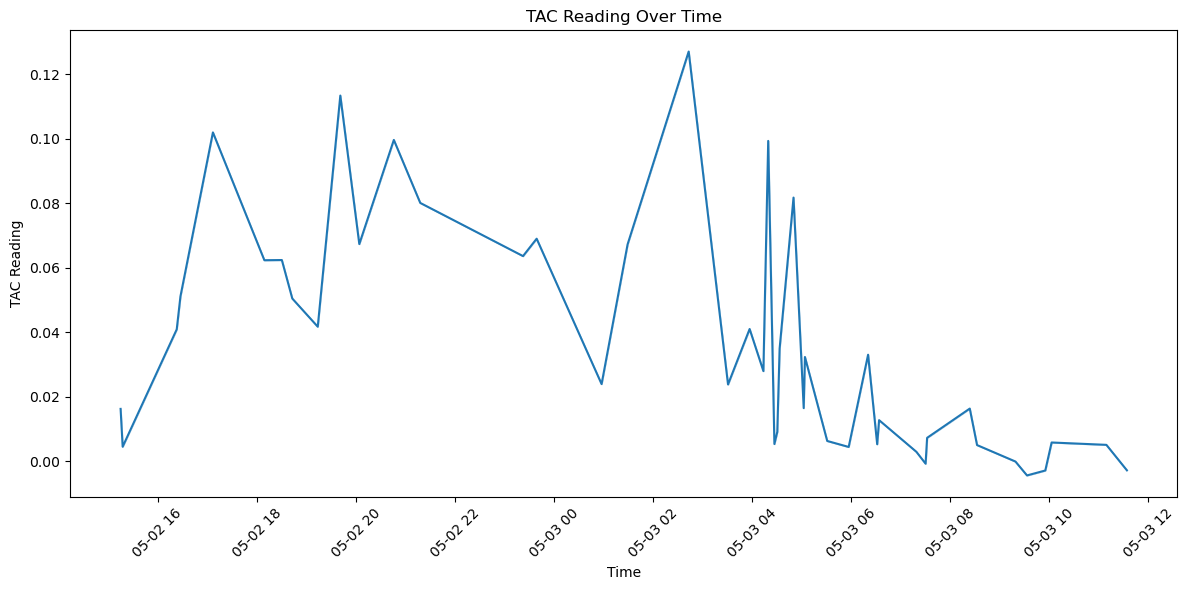

In [47]:
df_visualisation = pd.merge(collapsed_dfacc,df_tac1, on='time', how='left')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) 

# Create the line plot
sns.lineplot(x='time', y='TAC_Reading', data=df_visualisation)

# Customize the plot
plt.title('TAC Reading Over Time')
plt.xlabel('Time')
plt.ylabel('TAC Reading')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

### Approaches

The approach of Paper 6 indicates that they view the problem as a classification problem:

<i> "Heavy Drinking Classifier: We develop a model that makes
classifications on 10-second windows of accelerometer data to
support the delivery of interventions in real-time. We train several
machine learning classifiers including a convolutional neural
network, shallow neural network, random forest, and support
vector machine to make classifications of sober (TAC < 0.08)
vs. intoxicated (TAC ≥ 0.08). The random forest performs the
best, achieving an accuracy of 77.5%" </i>


These are all classification algorithms, and approaching this problem as a time series regression model can hinder accuracy.



In [48]:
df = df_main.copy()

In [49]:
df

,time,x,y,z,TAC_Reading,Intoxicated
834,2017-05-02 15:15:00,0.000039,0.000133,0.007171,0.016196,0.0
835,2017-05-02 15:15:00,-0.001684,0.013699,0.013174,0.016196,0.0
836,2017-05-02 15:15:00,0.000161,0.000504,-0.006281,0.016196,0.0
837,2017-05-02 15:15:00,-0.000195,0.001919,0.003258,0.016196,0.0
838,2017-05-02 15:15:10,0.000089,0.000094,0.007260,0.016196,0.0
...,...,...,...,...,...,...
38848,2017-05-03 16:33:30,0.023904,0.268036,0.171129,-0.002856,0.0
38849,2017-05-03 16:33:40,-0.071922,0.202083,0.232344,-0.002856,0.0
38850,2017-05-03 16:33:50,0.019826,0.305962,0.189697,-0.002856,0.0
38851,2017-05-03 16:34:00,0.117672,0.235405,0.245715,-0.002856,0.0


In [50]:
#Treat as multi-variate time series??

minDate = min(df.time)
maxDate = max(df.time)
print(minDate)
print(maxDate)

2017-05-02 15:15:00
2017-05-03 16:34:10


In [51]:
# Creating the data sequence
seq = pd.DataFrame(pd.date_range(minDate,maxDate))
# Look at the head
seq.head()

,0
0,2017-05-02 15:15:00
1,2017-05-03 15:15:00


In [52]:
# adding the column name 
seq.columns = ['Time']

In [53]:
#Or split it and continue with logistic regression?

y=df['Intoxicated']
y

834      0.0
835      0.0
836      0.0
837      0.0
838      0.0
        ... 
38848    0.0
38849    0.0
38850    0.0
38851    0.0
38852    0.0
Name: Intoxicated, Length: 38019, dtype: float64

In [54]:
#not really utilising timestamp so drop that as well

columns_to_drop = ['time', 'TAC_Reading', 'Intoxicated']
X = df.copy()
# Drop the specified columns
X = X.drop(columns=columns_to_drop)

In [55]:
X

,x,y,z
834,0.000039,0.000133,0.007171
835,-0.001684,0.013699,0.013174
836,0.000161,0.000504,-0.006281
837,-0.000195,0.001919,0.003258
838,0.000089,0.000094,0.007260
...,...,...,...
38848,0.023904,0.268036,0.171129
38849,-0.071922,0.202083,0.232344
38850,0.019826,0.305962,0.189697
38851,0.117672,0.235405,0.245715


In [56]:
#Splitting the data into train and Validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.3, random_state=124)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26613, 3)
(11406, 3)
(26613,)
(11406,)


In [57]:
#Standardizing the numeric attributes in the train and test data

scaler = MinMaxScaler()
X_train[['x','y','z']] = scaler.fit_transform(X_train[['x','y','z']])
X_test[['x','y','z']]=scaler.transform(X_test[['x','y','z']])

### Logistic Regression Model Building

In [58]:
logistic_model = LogisticRegression(class_weight='balanced')

logistic_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [59]:
#Generating Predictions
train_preds = logistic_model.predict(X_train)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
test_preds = logistic_model.predict(X_test)
test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

In [60]:
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [61]:
logistic_model.coef_

array([[ 0.17376715, -0.29347857,  0.43305334]])

In [62]:
#Confusion Matrix  

confusion_matrix(y_train,train_preds)

array([[19013,   676],
       [ 6453,   471]], dtype=int64)

In [63]:
train_accuracy_1= accuracy_score(y_train,train_preds)
train_recall_1= recall_score(y_train,train_preds)
train_precision_1= precision_score(y_train,train_preds)

test_accuracy_1= accuracy_score(y_test,test_preds)
test_recall_1= recall_score(y_test,test_preds)
test_precision_1= precision_score(y_test,test_preds)
print("************************************************")

print("Train Accuracy:",train_accuracy_1)
print('Train Recall:',train_recall_1)
print("Train Precision",train_precision_1)
print("************************************************")
print("Test Accuracy:",test_accuracy_1)
print("Test Recall:",test_recall_1)
print('Test Precision:',test_precision_1)

************************************************
Train Accuracy: 0.7321233983391575
Train Recall: 0.06802426343154246
Train Precision 0.4106364428945074
************************************************
Test Accuracy: 0.7289146063475364
Test Recall: 0.0673854447439353
Test Precision: 0.3816793893129771


In [64]:
#According to Paper 6, . The random forest performs the best, achieving an accuracy of 77.5%

In [65]:
#Classification report
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

         0.0       0.75      0.97      0.84     19689
         1.0       0.41      0.07      0.12      6924

    accuracy                           0.73     26613
   macro avg       0.58      0.52      0.48     26613
weighted avg       0.66      0.73      0.65     26613



In [66]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84      8438
         1.0       0.38      0.07      0.11      2968

    accuracy                           0.73     11406
   macro avg       0.56      0.51      0.48     11406
weighted avg       0.65      0.73      0.65     11406



In [67]:
model_performance = pd.DataFrame(np.array(['Logistic - All',train_accuracy_1,train_recall_1,train_precision_1,
                                           test_accuracy_1,test_recall_1,test_precision_1]).reshape(1,7))

model_performance.columns = ['Model','Train Accuracy','Train Recall','Train Precision',
                             'Test Accuracy','Test Recall','Test Precision']

In [68]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - All,0.7321233983391575,0.06802426343154246,0.4106364428945074,0.7289146063475364,0.0673854447439353,0.3816793893129771


In [69]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }


In [70]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [71]:
crossVal_result = cross_validation(logistic_model, X_train,y_train, 5)
crossVal_resultDF =  pd.DataFrame(crossVal_result)
crossVal_resultDF

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,0.732504,73.195431,0.416667,0.409744,0.070410,0.068638,0.120463,0.117562,0.730979,73.193556,0.385366,0.408161,0.057040,0.068314,0.099371,0.116978
1,0.732832,73.195431,0.415819,0.409744,0.066438,0.068638,0.114570,0.117562,0.730227,73.193556,0.395918,0.408161,0.070036,0.068314,0.119018,0.116978
2,0.730531,73.195431,0.397938,0.409744,0.069688,0.068638,0.118605,0.117562,0.733609,73.193556,0.433198,0.408161,0.077256,0.068314,0.131127,0.116978
3,0.731436,73.195431,0.400670,0.409744,0.064801,0.068638,0.111560,0.117562,0.735814,73.193556,0.452991,0.408161,0.076590,0.068314,0.131026,0.116978
4,0.732469,73.195431,0.417629,0.409744,0.071854,0.068638,0.122612,0.117562,0.729049,73.193556,0.373333,0.408161,0.060650,0.068314,0.104348,0.116978


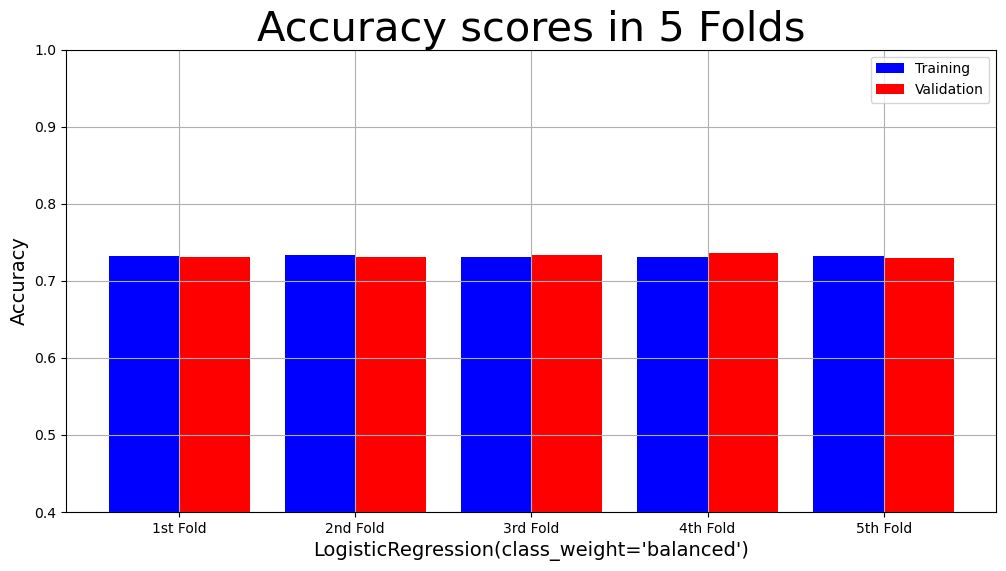

In [72]:
plot_result(logistic_model,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            crossVal_resultDF["Training Accuracy scores"],
            crossVal_resultDF["Validation Accuracy scores"])

### ROC and AUC

In [86]:
fpr, tpr, threshold = roc_curve(y_train, train_preds_prob)
roc_auc = auc(fpr, tpr)

<IPython.core.display.Javascript object>


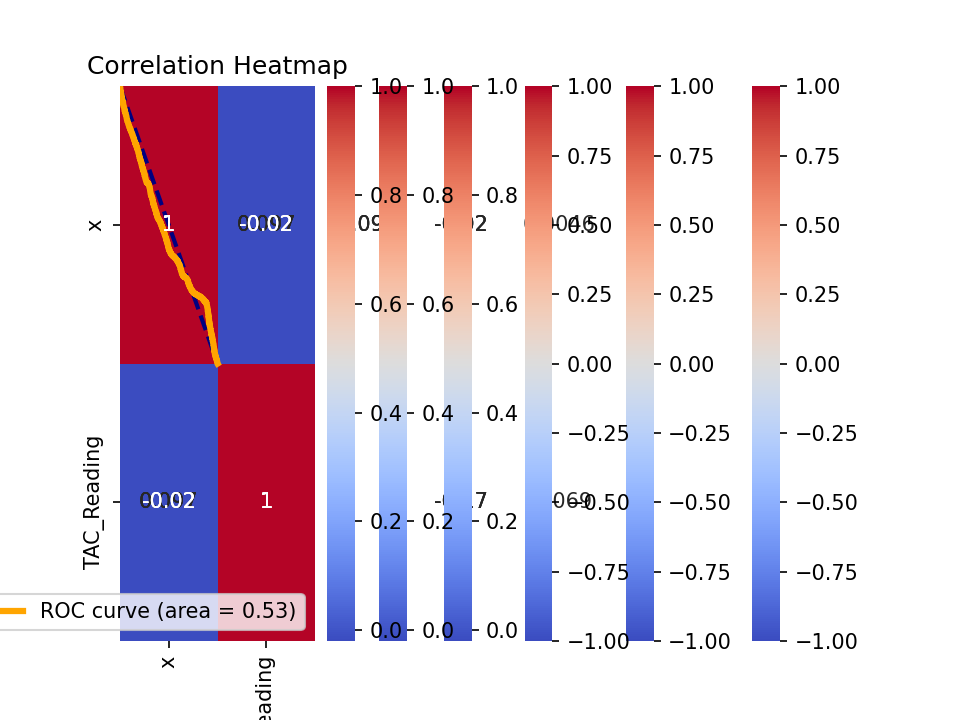

In [87]:
%matplotlib notebook
# plt.figure()
plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plt.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")

In [88]:
# #manual inspection of NA values
# roc_df = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':threshold})

# roc_df

,FPR,TPR,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.000144,0.677782
2,0.000000,0.000289,0.677208
3,0.000152,0.000289,0.675497
4,0.000152,0.000578,0.675342
...,...,...,...
9550,0.999695,0.999711,0.481416
9551,0.999695,0.999856,0.480977
9552,0.999746,0.999856,0.480378
9553,0.999746,1.000000,0.480293


In [89]:
# roc_df.sort_values('TPR',ascending=False,inplace=True)


In [90]:
# optimal_idx = np.argmax(tpr - fpr)
# optimal_threshold = threshold[optimal_idx]

In [91]:
# optimal_threshold

0.49122020481247686

In [92]:
# custom_threshold = 0.491

# ## To get in 0-1 format vector (pandas Series)
# final_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in train_preds_prob])
# final_pred_array.value_counts()

# final_test_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in test_preds_prob])
# final_test_pred_array.value_counts()

0    10910
1      496
dtype: int64

In [93]:
# ## To get True-False format vector (pandas Series)
# final_pred = pd.Series(train_preds_prob > 0.099)
# final_pred.value_counts()
# final_test_pred=pd.Series(test_preds_prob > 0.099)

In [94]:
# print(classification_report(y_train,final_pred))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     19689
         1.0       0.26      1.00      0.41      6924

    accuracy                           0.26     26613
   macro avg       0.13      0.50      0.21     26613
weighted avg       0.07      0.26      0.11     26613



D:\Divina_Data_Science\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Divina_Data_Science\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Divina_Data_Science\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
# print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      8438
         1.0       0.26      1.00      0.41      2968

    accuracy                           0.26     11406
   macro avg       0.13      0.50      0.21     11406
weighted avg       0.07      0.26      0.11     11406



D:\Divina_Data_Science\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Divina_Data_Science\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Divina_Data_Science\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
# train_accuracy= accuracy_score(y_train,final_pred)
# train_recall= recall_score(y_train,final_pred)
# print(train_accuracy)
# print(train_recall)

# test_accuracy= accuracy_score(y_test,final_test_pred)
# test_recall= recall_score(y_test,final_test_pred)
# print(test_accuracy)
# print(test_recall)

0.2601735993687296
1.0
0.2602139224969314
1.0
